In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Combine all data set into one file

In [150]:
a = pd.read_csv("NRT_TPE.csv")
b = pd.read_csv("TPE_NRT.csv")
c = pd.read_csv("HND_TPE.csv")
d = pd.read_csv("TPE_HND.csv")

# Combine all of the data into one file 
df = pd.concat([a, b, c, d])     # "axis" argument default is 0 => vertically concat

# Drop repeated rows (Before reset index)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
df = df.drop_duplicates()

# Reset index
df = df.reset_index()


df.to_csv("Flight_Data.csv", index=False)

In [151]:
df = pd.read_csv("Flight_Data.csv")
df

,index,Airline,Source,Destination,Duration,Total stops,Price,Date
0,0,Peach,NRT,TPE,3h 55m,nonstop,$119,2023-05-10
1,2,Scoot,NRT,TPE,3h 35m,nonstop,$143,2023-05-10
2,3,Jetstar Japan,NRT,TPE,3h 50m,nonstop,$122,2023-05-10
3,4,Tigerair Taiwan,NRT,TPE,3h 55m,nonstop,$136,2023-05-10
4,6,STARLUX Airlines,NRT,TPE,3h 30m,nonstop,$235,2023-05-10
...,...,...,...,...,...,...,...,...
4484,1180,EVA Air,TPE,HND,3h 00m,nonstop,$598,2023-07-31
4485,1181,EVA Air,TPE,HND,3h 10m,nonstop,$598,2023-07-31
4486,1182,Korean Air,TPE,HND,8h 30m,1 stop,$348,2023-07-31
4487,1183,Cathay Pacific,TPE,HND,7h 15m,1 stop,$432,2023-07-31


TODO:
- Airline => Airline Average
- One hot encoding of source and destination
- Total stops => numercial
- Price => Numercial
- Date, Duration => Standard datetime format

# EDA (Exploratory Data Analysis)
https://www.sightingdata.com/post/how-to-do-eda/

## Define Functions for Cleaning Data


##### Dealing the problem of cooperation between airlines

In [152]:
# df2 is the dataframe of those which has multiple airlines
df2 = df[df["Airline"].str.contains(",")]

# Drop those rows with multiple airlines in df
Index = df[df["Airline"].str.contains(",")].index
df.drop(Index, inplace=True)
df

,index,Airline,Source,Destination,Duration,Total stops,Price,Date
0,0,Peach,NRT,TPE,3h 55m,nonstop,$119,2023-05-10
1,2,Scoot,NRT,TPE,3h 35m,nonstop,$143,2023-05-10
2,3,Jetstar Japan,NRT,TPE,3h 50m,nonstop,$122,2023-05-10
3,4,Tigerair Taiwan,NRT,TPE,3h 55m,nonstop,$136,2023-05-10
4,6,STARLUX Airlines,NRT,TPE,3h 30m,nonstop,$235,2023-05-10
...,...,...,...,...,...,...,...,...
4484,1180,EVA Air,TPE,HND,3h 00m,nonstop,$598,2023-07-31
4485,1181,EVA Air,TPE,HND,3h 10m,nonstop,$598,2023-07-31
4486,1182,Korean Air,TPE,HND,8h 30m,1 stop,$348,2023-07-31
4487,1183,Cathay Pacific,TPE,HND,7h 15m,1 stop,$432,2023-07-31


In [153]:
df2['Airline']  = df2['Airline'].str.split(",")
list = df2["Airline"].values.tolist()
'''
list =
[[airline1, airline2],[airline1, airline2]............]
'''
airline1 = []
for i in range(len(list)):
    airline1.append(list[i][0])
airline2 = []
for i in range(len(list)):
    airline2.append(list[i][1])

# Split two airlines and append them to the origin dataframe
df2_1 = df2.copy()
df2_1["Airline"] = airline1

df2_2 = df2.copy()
df2_2["Airline"] = airline2

# Combine the three to the same dataframe
df = pd.concat([df, df2_1, df2_2], axis = 0, ignore_index=True)   # 5055 rows



/var/folders/gl/stf2yn_54sdd_k_jlfmc4nvr0000gn/T/ipykernel_76901/3079306518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Airline']  = df2['Airline'].str.split(",")


In [154]:
def clean_duration(duration):
    duration = duration.values.tolist()
    duration_hours = []
    duration_mins = []
    for i in range(len(duration)):
        duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
        duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) # Extracts only minutes from duration

    d = []
    for i in range(len(duration)):
        d.append(duration_hours[i]*60+duration_mins[i])
        
    return d
def clean_price(price):
    price = price.str.replace(',','',regex=True)
    price = price.str.strip("$")                    # Drop Dollar Sign $
    price = price.astype(float)                     # Change the data type
    return price

def price_ave_per_airlines(df):
    # 🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟
    # Use this line to create mean price of airlines to all data
    return df.groupby("Airline")['Price'].transform('mean')

def clean_date(date):
    date = pd.to_datetime(date)
    return date

df["Duration"] = clean_duration(df['Duration'])
df["Price"] = clean_price(df['Price'])
df["Average Price Per Airlines"] = price_ave_per_airlines(df)
df["Date"] = clean_date(df["Date"])

In [155]:
# Remember to add "axis = 1". The default is axis = 0
df.drop(["Airline",'Date', 'index'], axis = 1)

,Source,Destination,Duration,Total stops,Price,Average Price Per Airlines
0,NRT,TPE,235,nonstop,119.0,211.750577
1,NRT,TPE,215,nonstop,143.0,213.128378
2,NRT,TPE,230,nonstop,122.0,200.277419
3,NRT,TPE,235,nonstop,136.0,226.320917
4,NRT,TPE,210,nonstop,235.0,386.341121
...,...,...,...,...,...,...
5050,TPE,HND,390,1 stop,323.0,411.507042
5051,TPE,HND,325,1 stop,297.0,341.878788
5052,TPE,HND,420,1 stop,329.0,411.507042
5053,TPE,HND,295,1 stop,406.0,341.878788


## Dealing with **Outliers**

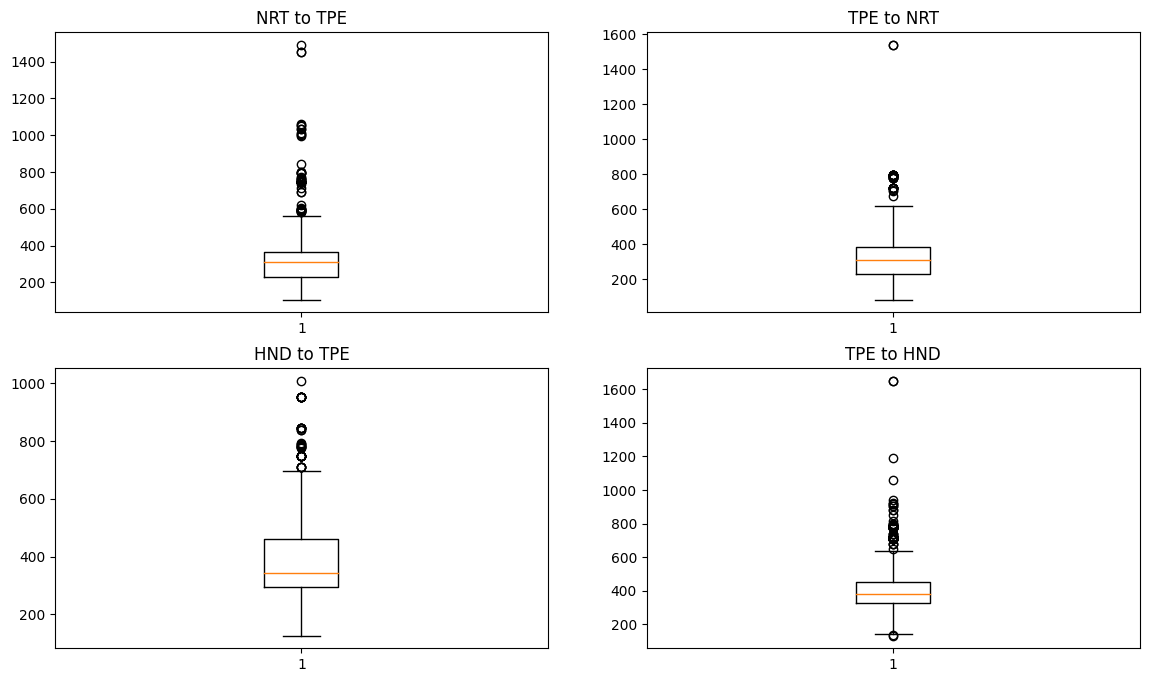

In [156]:
# Define the function of getting outliers
def get_outliers(price):
    Q1 = price.quantile(0.25)
    Q3 = price.quantile(0.75)

    # Inter Quantile Range
    IQR = Q1 - Q3

    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    return lower_lim, upper_lim

# Split four routes into four dataframes
sources = ['NRT','TPE','HND','TPE']
destinations = ['TPE', 'NRT', 'TPE', 'HND']
df_nrt_tpe = df[df['Source']=="NRT"]
df_tpe_nrt = df[df['Destination'] == "NRT"]
df_hnd_tpe = df[df['Source']=="HND"]
df_tpe_hnd = df[df['Destination'] == "HND"]
dfs = [df_nrt_tpe, df_tpe_nrt, df_hnd_tpe, df_tpe_hnd]

# Boxplots for each route
k = 0
figures, axis = plt.subplots(2, 2, figsize=(14,8))
for i in range(2):
    for j in range(2):
        axis[i,j].boxplot(dfs[k]['Price'])
        axis[i,j].set_title(f"{dfs[k]['Source'].iloc[0]} to {dfs[k]['Destination'].iloc[0]}")
        k += 1

### Every Route has outliers, so we use IQR to deal with this problem

In [157]:
# get quantile to deal with outliers
lower = []
upper = []

for df in dfs:
    x = get_outliers(df['Price'])
    lower.append(x[1])
    upper.append(x[0])

num_of_obs = pd.DataFrame(columns = ['Route','Before Dropping Outliers', 'After'])
routes = ['NRT to TPE', 'TPE to NRT', 'HND to TPE', 'TPE to HND']
before = []
after = []
for df in dfs:
    before.append(len(df))

# drop outliers
k = 0
for df in dfs:
    low = float(lower[k])
    up = float(upper[k])
    
    # Drop Outliers
    df.drop(df.loc[df['Price']<low].index, inplace=True)
    df.drop(df.loc[df['Price']>up].index, inplace=True)
    
    df.reset_index(drop = True,inplace=True)
    k+=1

for df in dfs:
    after.append(len(df))

num_of_obs['Route'] = routes
num_of_obs['Before Dropping Outliers'] = before
num_of_obs['After'] = after
num_of_obs['Dropped Outliers Amount'] = num_of_obs['Before Dropping Outliers'] - num_of_obs['After']
num_of_obs



,Route,Before Dropping Outliers,After,Dropped Outliers Amount
0,NRT to TPE,919,758,161
1,TPE to NRT,1286,1170,116
2,HND to TPE,1611,1320,291
3,TPE to HND,1239,892,347


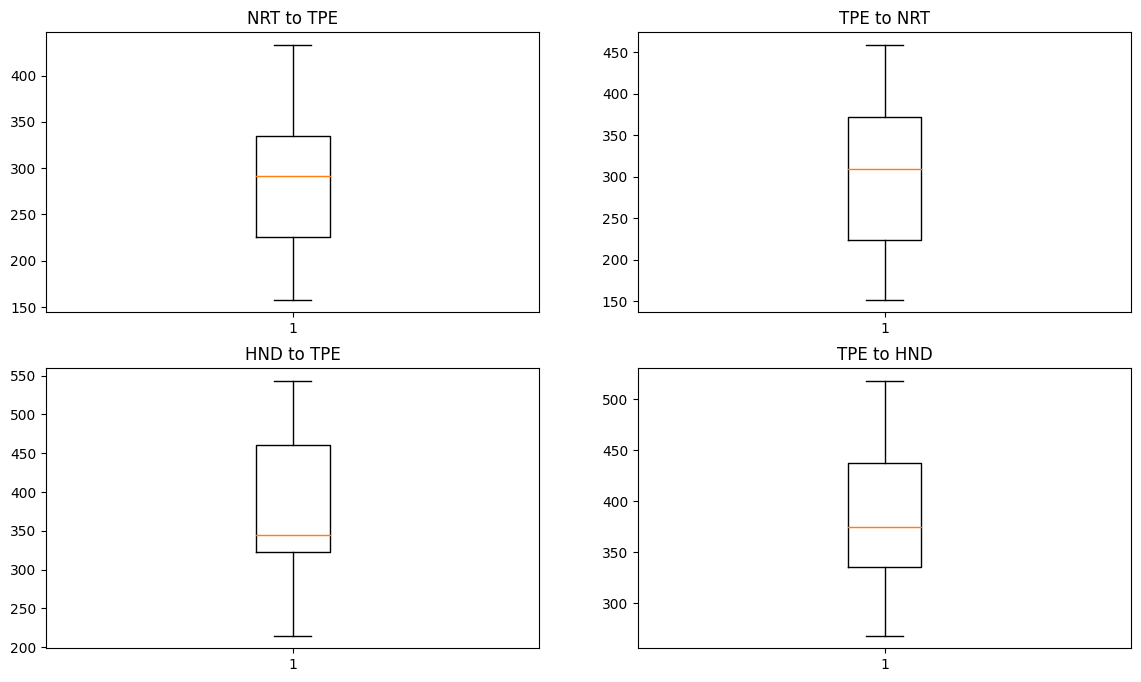

In [158]:
k = 0
figures, axis = plt.subplots(2, 2, figsize=(14,8))
for i in range(2):
    for j in range(2):
        axis[i,j].boxplot(dfs[k]['Price'])
        axis[i,j].set_title(f"{dfs[k]['Source'].iloc[0]} to {dfs[k]['Destination'].iloc[0]}")
        k += 1

# There's no outlier now.

### Combine the four routes into one DataFrame

In [159]:
# This function is sooooo convenient
df = pd.concat(dfs)


### Check for null value

In [160]:
print(df.isnull().sum())
'''
It will return a series telling us the number of NA in each column (variable)
'''

index                         0
Airline                       0
Source                        0
Destination                   0
Duration                      0
Total stops                   0
Price                         0
Date                          0
Average Price Per Airlines    0
dtype: int64


'\nIt will return a series telling us the number of NA in each column (variable)\n'

## Changing String Variables into Numerical (One hot encoding)

Useful functions for Descriptive Statistics:
1. `SERIES.value_counts()`
2. `SERIES.unique()`
3. `DATAFRAME.drop([COLUMNS], axis = 1, inplace = True)`
4. `catplot()` in `seaborn` module
   - `sns.catplot(x = CATEGORY, y = INTEREST, data = DATAFRAME.sort_values(CATEGORY, ascending = False) , kind = "boxen", height = , aspect = )`

Airlines and Price

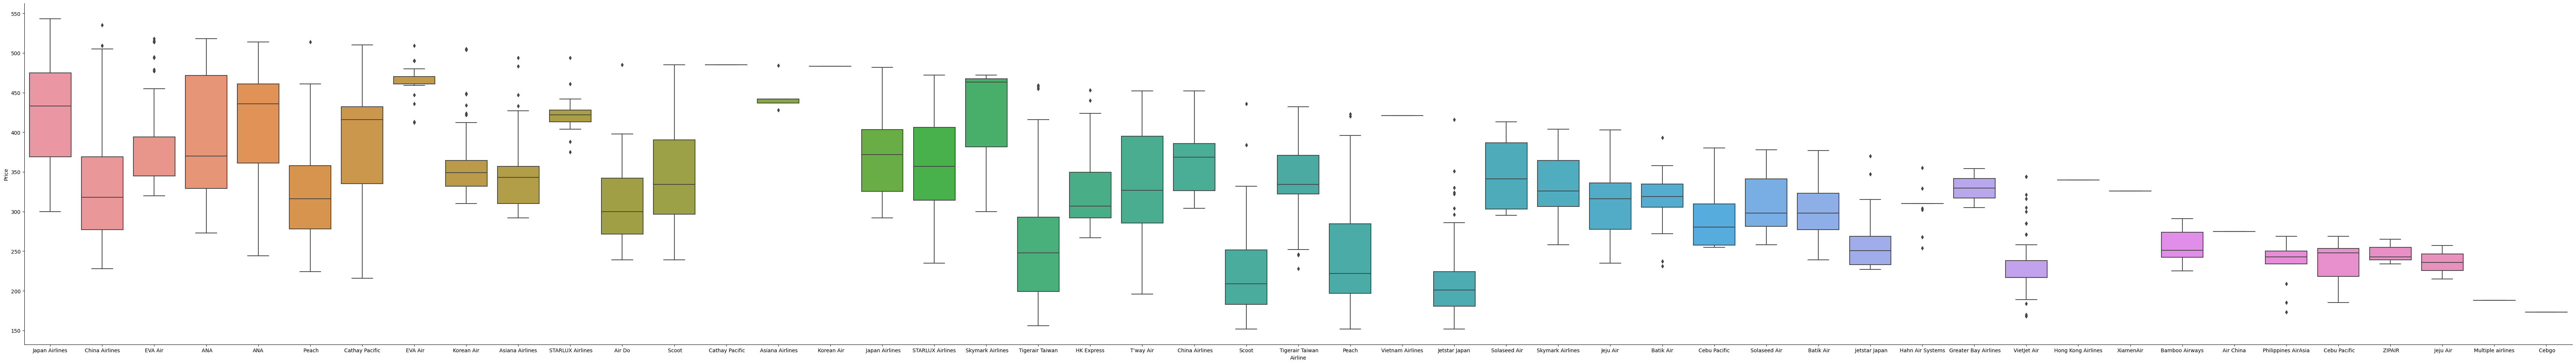

In [161]:
import seaborn as sns
sns.catplot(y = "Price", x= "Airline", 
            data = df.sort_values("Price", ascending = False)
            ,kind="box" , height = 10, aspect = 7)

Drop `Airline`, as it will be replaced by "Average Price Per Airlines"

In [162]:
df.drop('Airline', axis = 1, inplace = True)

### Analysis of sources

- Use `value_counts()` to calculate the numbers of each values in on variable.

In [163]:
df['Source'].value_counts()


TPE    2062
HND    1320
NRT     758
Name: Source, dtype: int64

Draw box plot for Price in each source (Using `catplot` method in `seaborn` module)

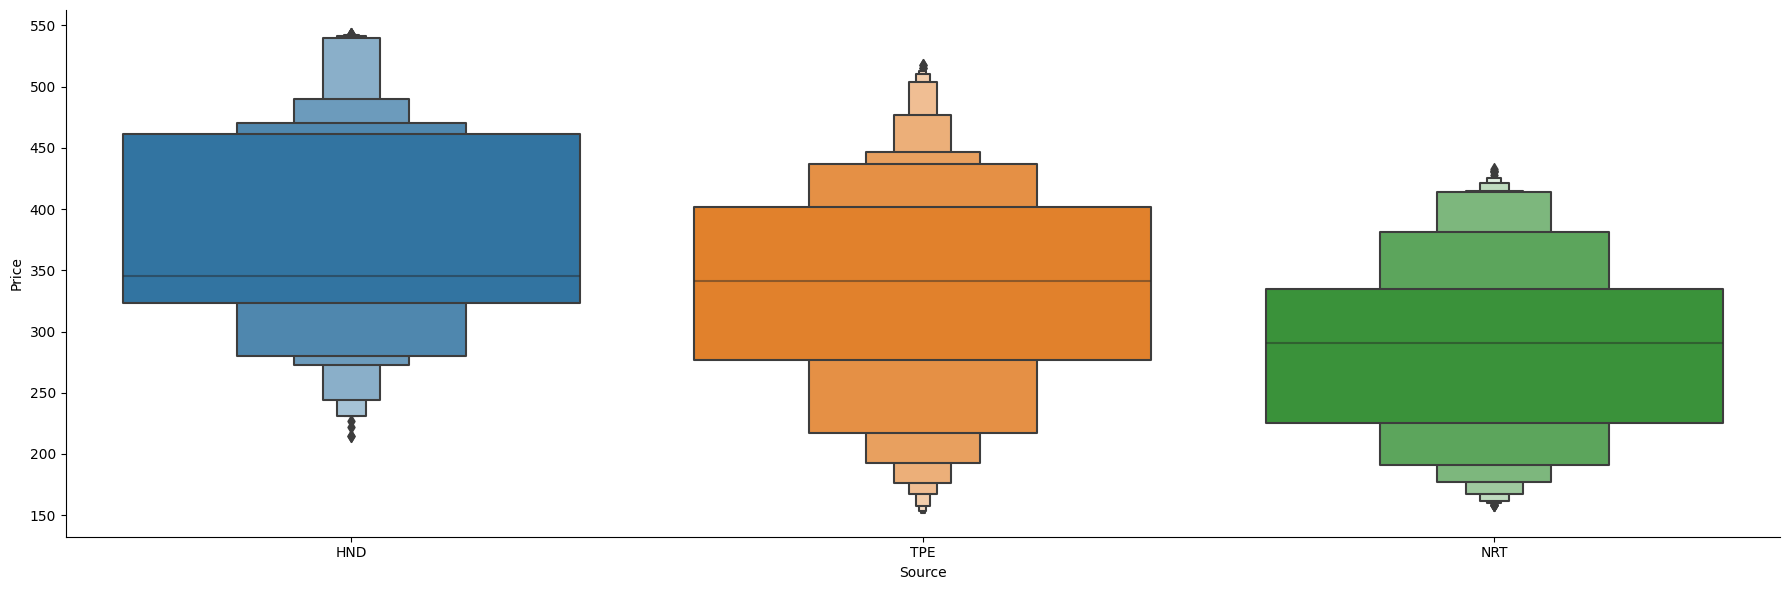

In [164]:
import seaborn as sns
sns.catplot(y = "Price", x= "Source", 
            data = df.sort_values("Price", ascending = False)
            , kind="boxen", height = 6, aspect = 3)

Changing the string variable of Source to two dummies $(3 - 1)$

In [165]:

source = df[['Source']]       # dataframe
source = pd.get_dummies(source, drop_first = True)

# Horizontally Concat two DataFrames
df = pd.concat([df, source], axis = 1).reset_index(drop=True)
df


,index,Source,Destination,Duration,Total stops,Price,Date,Average Price Per Airlines,Source_NRT,Source_TPE
0,6,NRT,TPE,210,nonstop,235.0,2023-05-10,386.341121,1,0
1,7,NRT,TPE,230,nonstop,279.0,2023-05-10,395.290107,1,0
2,8,NRT,TPE,220,nonstop,258.0,2023-05-10,386.341121,1,0
3,9,NRT,TPE,220,nonstop,326.0,2023-05-10,408.046642,1,0
4,12,NRT,TPE,225,nonstop,329.0,2023-05-10,505.394340,1,0
...,...,...,...,...,...,...,...,...,...,...
4135,1136,TPE,HND,390,1 stop,323.0,2023-07-28,411.507042,0,1
4136,1147,TPE,HND,325,1 stop,297.0,2023-07-29,341.878788,0,1
4137,1150,TPE,HND,420,1 stop,329.0,2023-07-29,411.507042,0,1
4138,1151,TPE,HND,295,1 stop,406.0,2023-07-29,341.878788,0,1


### Analysis of Destinations

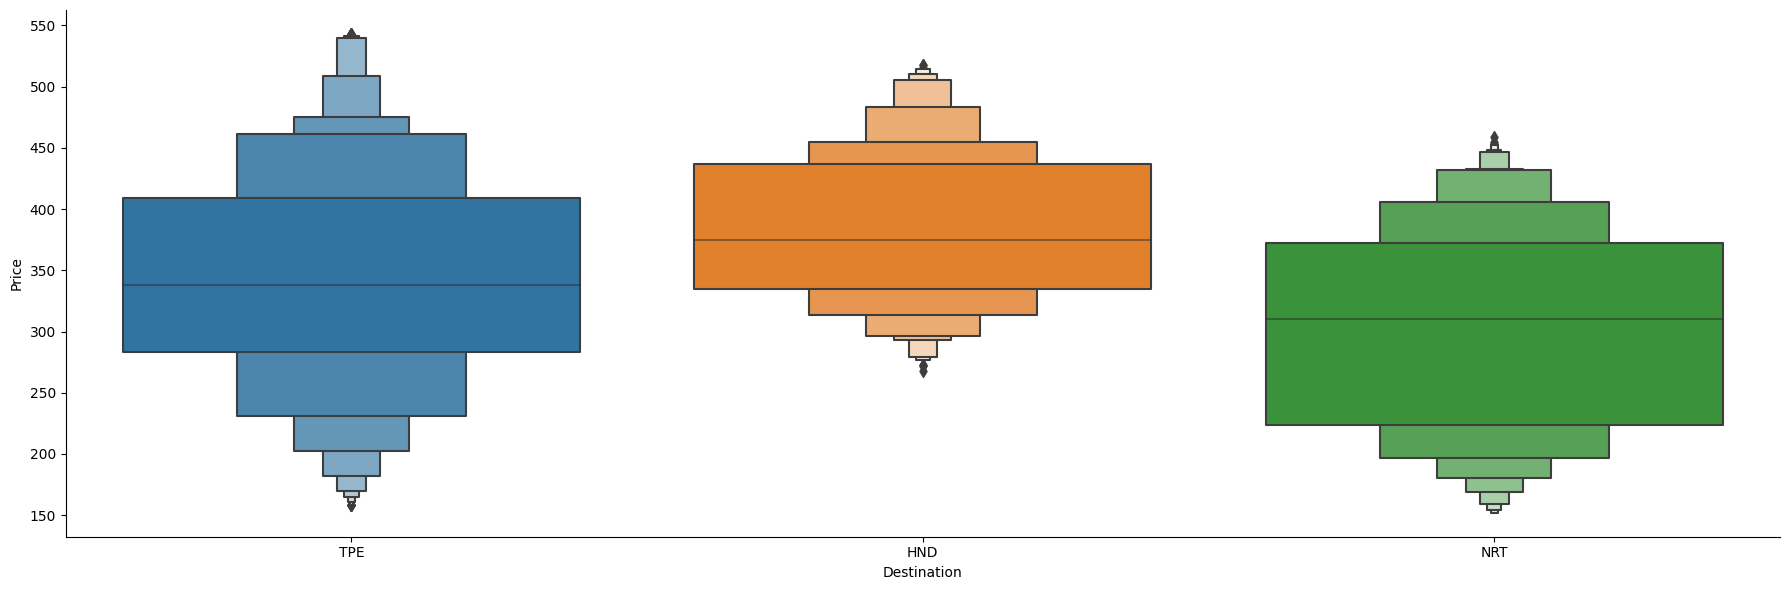

In [166]:
sns.catplot(y = "Price", x= "Destination", 
            data = df.sort_values("Price", ascending = False)
            , kind="boxen", height = 6, aspect = 3)

Changing the string variable of Destination to two dummies $(3 - 1)$

In [167]:
dest = df[['Destination']]       # dataframe
dest = pd.get_dummies(dest, drop_first = True)

# Horizontally Concat two DataFrames
df = pd.concat([df, dest], axis = 1).reset_index(drop=True)
df

,index,Source,Destination,Duration,Total stops,Price,Date,Average Price Per Airlines,Source_NRT,Source_TPE,Destination_NRT,Destination_TPE
0,6,NRT,TPE,210,nonstop,235.0,2023-05-10,386.341121,1,0,0,1
1,7,NRT,TPE,230,nonstop,279.0,2023-05-10,395.290107,1,0,0,1
2,8,NRT,TPE,220,nonstop,258.0,2023-05-10,386.341121,1,0,0,1
3,9,NRT,TPE,220,nonstop,326.0,2023-05-10,408.046642,1,0,0,1
4,12,NRT,TPE,225,nonstop,329.0,2023-05-10,505.394340,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4135,1136,TPE,HND,390,1 stop,323.0,2023-07-28,411.507042,0,1,0,0
4136,1147,TPE,HND,325,1 stop,297.0,2023-07-29,341.878788,0,1,0,0
4137,1150,TPE,HND,420,1 stop,329.0,2023-07-29,411.507042,0,1,0,0
4138,1151,TPE,HND,295,1 stop,406.0,2023-07-29,341.878788,0,1,0,0


### Analysis of Total stops

In [168]:
# total stops
print(df["Total stops"].value_counts())
df["Total stops"].unique()

nonstop    2417
1 stop     1714
2 stops       9
Name: Total stops, dtype: int64


array(['nonstop', '1 stop', '2 stops'], dtype=object)

Replace all value in     `Total stops`  with numbers

In [169]:
df["Total stops"].replace({'nonstop': 0, '1 stop': 1, '2 stops': 2}, inplace = True)

### Final Dataframe
Remember to add `axis = 1` command when you want to drop "columns".

We drop `Source` and `Destination` because we only need their dummies.

In [170]:
df.drop(['Source', 'Destination', 'Date'], axis = 1, inplace = True)
df['Total stops'] = df['Total stops'].astype(float)

In [171]:
df.isnull().sum()

index                         0
Duration                      0
Total stops                   0
Price                         0
Average Price Per Airlines    0
Source_NRT                    0
Source_TPE                    0
Destination_NRT               0
Destination_TPE               0
dtype: int64

In [172]:
# If we don't set index = False, the generated csv file will have a column named "unnamed"
df.to_csv("Flight_Data(Final).csv", index = False)